<a href="https://colab.research.google.com/github/ameyarsalvi/Autonomous_Vehicle/blob/master/TrafficSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random
import pickle
import pandas as pd

In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)

In [0]:
print(type(train_data))

<class 'dict'>


In [0]:
X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the number of labels"
assert(X_val.shape[0]==y_val.shape[0]),"The number of images is not equal to the number of labels"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images is not equal to the number of labels"
assert(X_train.shape[1:]==(32,32,3)),"The dimension of image isnt 32,32,3"
assert(X_val.shape[1:]==(32,32,3)),"The dimension of image isnt 32,32,3"
assert(X_test.shape[1:]==(32,32,3)),"The dimension of image isnt 32,32,3"

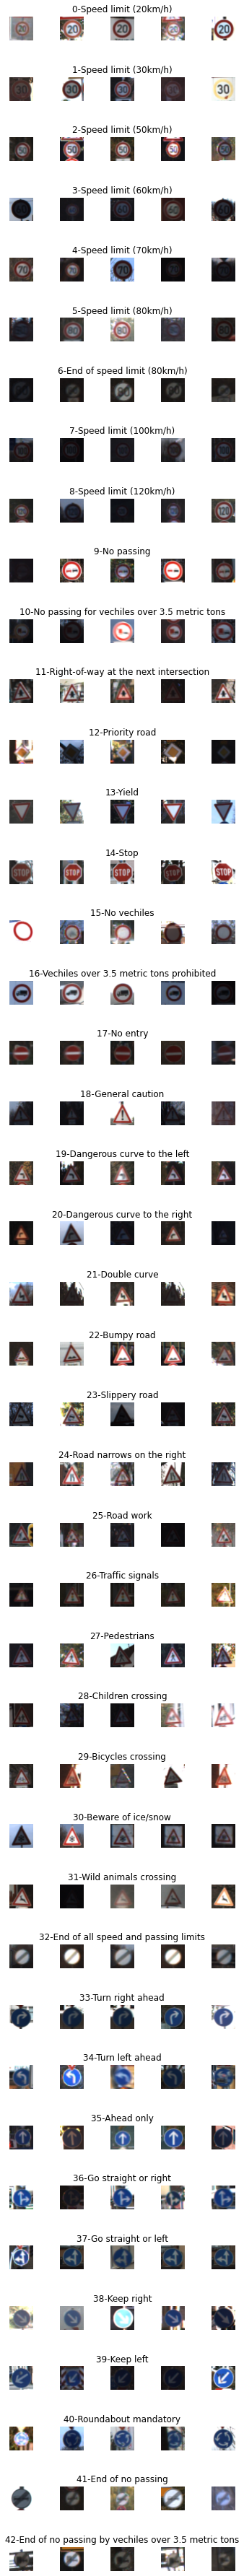

In [0]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

no_samples=[]

cols=5
no_classes=43

fig,axs=plt.subplots(nrows=no_classes,ncols=cols,figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+"-" +row["SignName"])
            no_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


<BarContainer object of 43 artists>

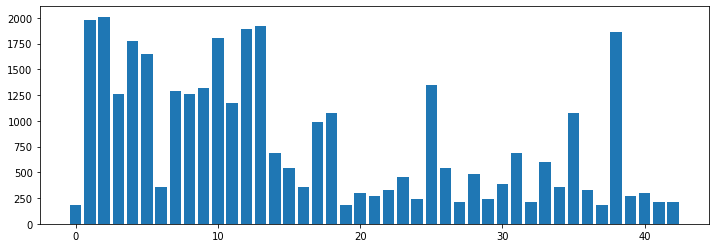

In [0]:
print(no_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,no_classes),no_samples)

(32, 32, 3)
36


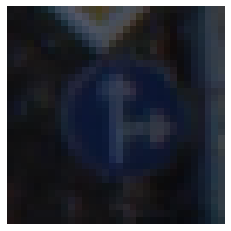

In [0]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(-0.5, 31.5, 31.5, -0.5)

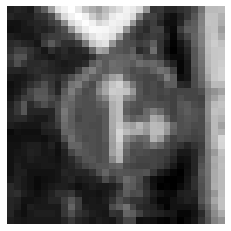

In [0]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

img=grayscale(X_train[1000])
plt.imshow(img,cmap='Greys_r')
plt.axis("off")

(32, 32)


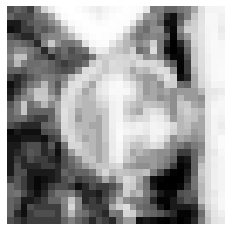

In [0]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img,cmap='Greys_r')
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img-img/255
  return img

X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))
X_test=np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


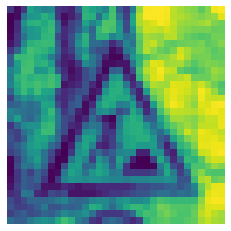

In [0]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train=X_train.reshape(34799, 32, 32,1)
X_test=X_test.reshape(12630, 32, 32,1)
X_val=X_val.reshape(4410, 32, 32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10)

datagen.fit(X_train)

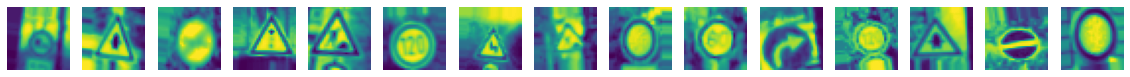

In [0]:
batches=datagen.flow(X_train,y_train,batch_size=20)

X_batch,y_batch=next(batches)
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout

for i in range (15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')


In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(150,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(150,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(75,(3,3),activation='relu'))
  model.add(Conv2D(75,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
 # model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
model=modified_model()
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 150)       3900      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 150)       562650    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 150)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 75)        101325    
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 75)          50700     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 75)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1200)            

In [0]:
h=model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 54s 27ms/step - loss: 1.0264 - accuracy: 0.7145 - val_loss: 0.1027 - val_accuracy: 0.9673
Epoch 2/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.2622 - accuracy: 0.9208 - val_loss: 0.0505 - val_accuracy: 0.9850
Epoch 3/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.1995 - accuracy: 0.9418 - val_loss: 0.0447 - val_accuracy: 0.9878
Epoch 4/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1617 - accuracy: 0.9534 - val_loss: 0.0280 - val_accuracy: 0.9921
Epoch 5/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1478 - accuracy: 0.9591 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 6/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1483 - accuracy: 0.9598 - val_loss: 0.0542 - val_accuracy: 0.9866
Epoch 7/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1458 - accuracy: 0.9620 - val_loss: 0.0487 -

Text(0.5, 0, 'epochs')

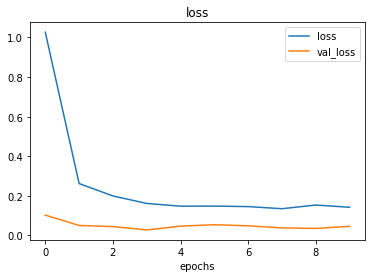

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

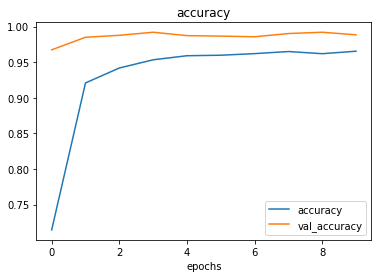

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [0]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test score :',score[0])
print('Test accuracy :',score[1])

Test score : 0.21312793982379583
Test accuracy : 0.9654790163040161


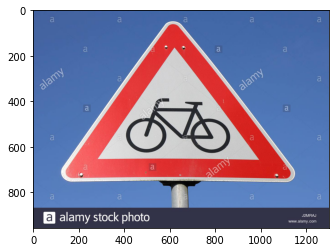

In [0]:
import requests
from PIL import Image

#url='https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'

#url='https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'

#url='https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'

#url='https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'

url='https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


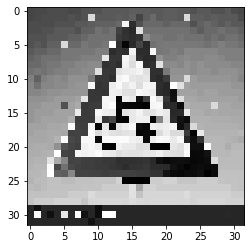

In [0]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)


In [0]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [29]
